# Example scenario comparison analysis

First import required libraries. Here we are using model-system data explorer, geopandas and matplotilib.

In [1]:
import os, sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
sys.path.append("../scripts/")

from data_explorer.scenario_data import ScenarioData
from data_explorer.scenario_comparison import ScenarioComparison

Then we'll load scenario data for two scenarios. Here we load data for 2018 and 2023. 

Model-system results are stored in same `model-system/Results` folder so we can use relative paths to scenario data.

In [2]:
scenario0 = ScenarioData("2018", "./V2018/koko_suomi/", "C:/Users/suppoatt/model-system-data/branch_main/Scenario_input_data/V2018/")
scenario1 = ScenarioData("2023", "./V2018/koko_suomi/", "C:/Users/suppoatt/model-system-data/branch_main/Scenario_input_data/V2018/")

Use subregion of Sourthern Finland

In [ ]:
scenario0.use_subregion("county", "Uusimaa")
scenario1.use_subregion("county", "Uusimaa")

### Scenario results
Take a look at the data:

In [6]:
display(scenario0.aggregations.iloc[1:5,])

,data_id,municipality,county,area
1,2,Maalahti,Pohjanmaa,Maalahti
2,3,Joensuu,Pohjois-Karjala,Joensuu
3,4,Joensuu,Pohjois-Karjala,Joensuu
4,5,Joensuu,Pohjois-Karjala,Joensuu


Plot column values:

c:\Users\suppoatt\.virtualenvs\Scripts-w_cXNV7M\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


(6605921.95, 7776430.96)

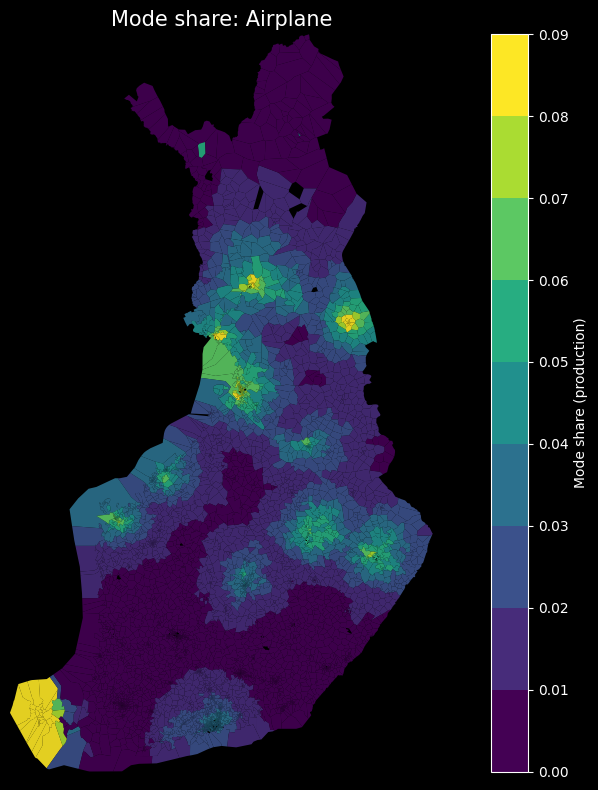

In [5]:
# Get mode share data to geodataframe
data = scenario0.zonedata_to_gdf(scenario0.mode_shares)

# Matplot
fig, ax = plt.subplots(figsize=(12, 8))
plt.style.use('dark_background')

# Discrete colour scale
discrete_cmap = plt.cm.get_cmap("viridis")

# Set bins to defined intervals
MAX = 0.1
MIN = 0.0
INTERVAL = 0.01
norm = mpl.colors.BoundaryNorm(np.arange(MIN, MAX, INTERVAL), discrete_cmap.N)  

# Visualize travel times into continuous coloring scheme
data.plot(ax=ax, column="airplane",  linewidth=0.03, 
          cmap=discrete_cmap, norm=norm,
          alpha=0.9, legend=True, 
          legend_kwds={"label": "Mode share (production)", "orientation": "vertical"})

# Themes
ax.set_axis_off()
plt.title("Mode share: Airplane", fontdict = {'fontsize':15})
plt.tight_layout()

# Set axis bb
xmin, ymin, xmax, ymax = data.total_bounds
pad = 0.05  # add a padding around the geometry
ax.set_xlim(xmin-pad, xmax+pad)
ax.set_ylim(ymin-pad, ymax+pad)